In [2]:
import os
os.chdir(r"C:/users/AAYUSHI/Jupyter Notes")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Datasets/kidney_disease.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le_1 = LabelEncoder()

In [10]:
data.iloc[:,6] = le_1.fit_transform(data.iloc[:,6])
data.iloc[:,7] = le_1.fit_transform(data.iloc[:,7])
data.iloc[:,8] = le_1.fit_transform(data.iloc[:,8])
data.iloc[:,9] = le_1.fit_transform(data.iloc[:,9])
data.iloc[:,16] = le_1.fit_transform(data.iloc[:,16])
data.iloc[:,17] = le_1.fit_transform(data.iloc[:,17])
data.iloc[:,18] = le_1.fit_transform(data.iloc[:,18])
data.iloc[:,19] = le_1.fit_transform(data.iloc[:,19])
data.iloc[:,20] = le_1.fit_transform(data.iloc[:,20])
data.iloc[:,21] = le_1.fit_transform(data.iloc[:,21])
data.iloc[:,22] = le_1.fit_transform(data.iloc[:,22])
data.iloc[:,23] = le_1.fit_transform(data.iloc[:,23])
data.iloc[:,24] = le_1.fit_transform(data.iloc[:,24])
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,notckd
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,notckd
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,notckd
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,notckd


In [11]:
from sklearn.impute import SimpleImputer
se = SimpleImputer(missing_values=np.nan, strategy="median")
data.iloc[:,1:6] = se.fit_transform(data.iloc[:,1:6])
data.iloc[:,10:16] = se.fit_transform(data.iloc[:,10:16])

In [12]:
se1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data.iloc[:,6:10] = se1.fit_transform(data.iloc[:,6:10])
data.iloc[:,16:24] = se1.fit_transform(data.iloc[:,16:24])

In [13]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<AxesSubplot:ylabel='Density'>

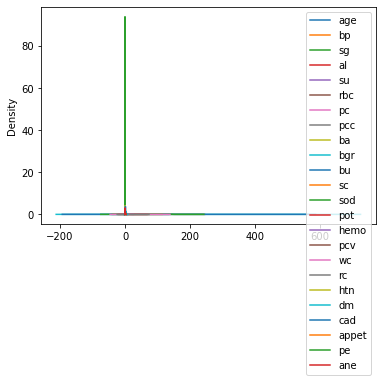

In [14]:
X = data.iloc[:,1:25]
y = data["classification"].str.strip()
X.plot.kde()

<AxesSubplot:ylabel='Density'>

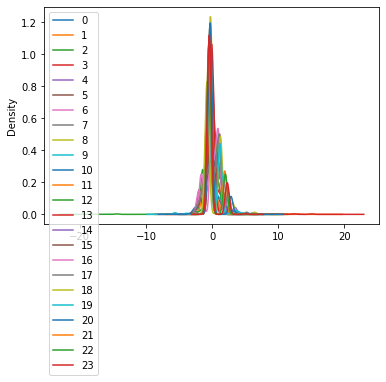

In [15]:
from sklearn.preprocessing import scale
X = scale(X)
X_df = pd.DataFrame(X)
X_df.plot.kde()

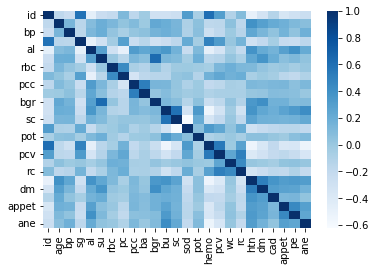

In [16]:
import seaborn as sns
sns.heatmap(data.corr(), cmap= "Blues")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
X_train.shape

(320, 24)

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = classifier.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
132,ckd,ckd
309,notckd,notckd
341,notckd,notckd
196,ckd,ckd
246,ckd,ckd
...,...,...
14,ckd,ckd
363,notckd,notckd
304,notckd,notckd
361,notckd,notckd


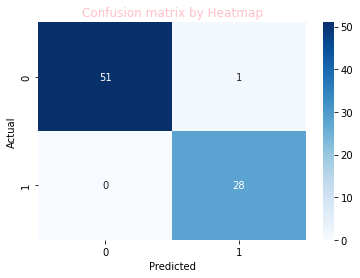

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,cmap="Blues",annot = True) 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix by Heatmap",color = "pink")
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        52
      notckd       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) *100)

98.75


In [23]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="micro")

0.9875

# K Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
nclassifier = KNeighborsClassifier(n_neighbors=19)
nclassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [25]:
y_pred = nclassifier.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
132,ckd,ckd
309,notckd,notckd
341,notckd,notckd
196,ckd,ckd
246,ckd,ckd
...,...,...
14,ckd,ckd
363,notckd,notckd
304,notckd,notckd
361,notckd,notckd


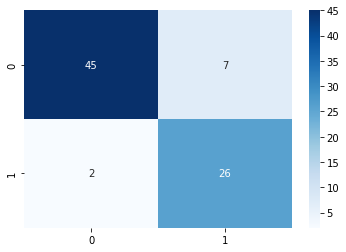

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot = True,cmap = "Blues")
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ckd       0.96      0.87      0.91        52
      notckd       0.79      0.93      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.90      0.88        80
weighted avg       0.90      0.89      0.89        80



In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) * 100)

88.75


In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="micro")

0.8875

# Support Vector Machine

In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel="linear",random_state=0)
svclassifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [31]:
y_pred = svclassifier.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
132,ckd,ckd
309,notckd,notckd
341,notckd,notckd
196,ckd,ckd
246,ckd,ckd
...,...,...
14,ckd,ckd
363,notckd,notckd
304,notckd,notckd
361,notckd,notckd


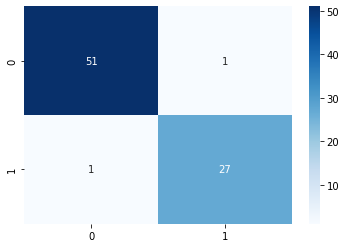

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot = True,cmap = "Blues")
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ckd       0.98      0.98      0.98        52
      notckd       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) * 100)

97.5


In [35]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="micro")

0.975

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
132,ckd,ckd
309,notckd,notckd
341,notckd,notckd
196,ckd,ckd
246,ckd,ckd
...,...,...
14,ckd,ckd
363,notckd,notckd
304,notckd,notckd
361,notckd,notckd


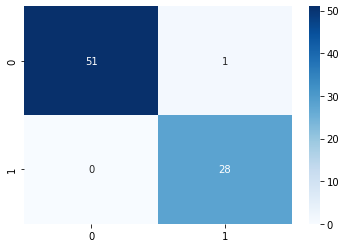

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot = True,cmap = "Blues")
plt.show()

In [39]:
from sklearn.metrics import classification_report
print("classification report:\n",classification_report(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        52
      notckd       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [40]:
from sklearn.metrics import accuracy_score
print("ACCURACY:",accuracy_score(y_test, y_pred) * 100)

ACCURACY: 98.75


In [41]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="micro")

0.9875

# Visualization(Accuracy Score)

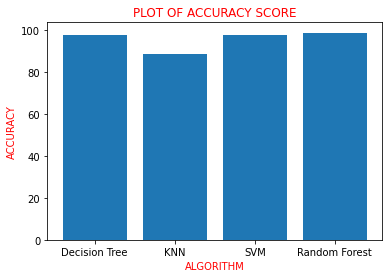

In [42]:
x = ["Decision Tree","KNN","SVM","Random Forest"]
y = [97.5,88.75,97.5,98.75]

plt.bar(x,y)
plt.title("PLOT OF ACCURACY SCORE", color = "red")
plt.xlabel("ALGORITHM",color= "red")
plt.ylabel("ACCURACY",color= "red")
plt.show()

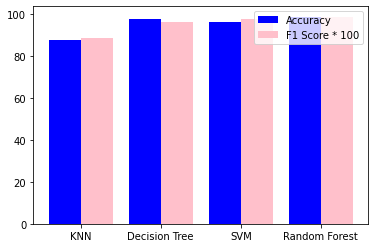

In [43]:
models = ["KNN", "Decision Tree", "SVM", "Random Forest"]
accuracy = [87.5, 97.5, 96.25, 98.75]
f1score = [88.75, 96.25, 97.50, 98.75]

X_axis = np.arange(len(models))

plt.xticks(X_axis, models)
plt.bar(X_axis - 0.2, accuracy, 0.4, label = "Accuracy", color = "blue")
plt.bar(X_axis + 0.2, f1score, 0.4, label = "F1 Score * 100", color = "pink")
plt.legend()
plt.show()